1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
import math
from scipy.stats import poisson

def poisson_probability(lam, k):
    return poisson.pmf(k, lam)

# Historic average
historic_average = 6.3

# Number of hurricanes in 2005
number_of_hurricanes_2005 = 15

# Calculating p-value
p_value = 1 - poisson.cdf(number_of_hurricanes_2005 - 1, historic_average)

# Level of significance
level_of_significance = 0.022

# Check if the p-value is less than the specified level of significance
is_significant = p_value < level_of_significance

# Printing the results
print(f"Historic average: {historic_average}")
print(f"Number of hurricanes in 2005: {number_of_hurricanes_2005}")
print(f"P-value: {p_value:.4f}")
print(f"Is the number of hurricanes in 2005 statistically significant? {'Yes' if is_significant else 'No'}")


Historic average: 6.3
Number of hurricanes in 2005: 15
P-value: 0.0022
Is the number of hurricanes in 2005 statistically significant? Yes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [13]:
import numpy as np
from scipy.stats import t

# Given data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Calculating the differences
differences = post - pre

# Number of observations
n = len(differences)

# Calculating the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # ddof=1 for sample standard deviation

# Calculating the t-statistic
t_statistic = mean_diff / (std_diff / np.sqrt(2 / n))

# Calculating the pooled standard deviation
pooled_std = np.sqrt((np.var(pre, ddof=1) + np.var(post, ddof=1)) / 2)

# Calculating the degrees of freedom
df = n - 1

# Two-tailed critical t-value at a significance level of 0.05
alpha = 0.05
critical_t = t.ppf(1 - alpha / 2, df)

# Calculating the p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Printing the results
print(f"Mean difference: {mean_diff:.4f}")
print(f"Pooled standard deviation: {pooled_std:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")

# Check if the difference is statistically significant
is_significant = p_value < alpha
print(f"Is the change in blood pressures statistically significant? {'Yes' if is_significant else 'No'}")


Mean difference: 18.7000
Pooled standard deviation: 11.0416
T-statistic: 0.9100
Degrees of freedom: 9
P-value: 0.3865
Is the change in blood pressures statistically significant? No


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

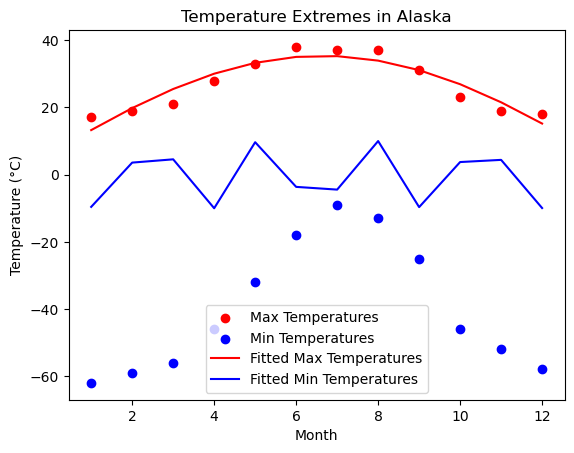

Time offset difference: -1.3490


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plotting the given data
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')

# Define a suitable function for curve fitting
def temp_function(month, a, b, c):
    return a * np.sin(b * (month - c))

# Performing curve fitting
params_max, covariance_max = curve_fit(temp_function, months, max_temps)
params_min, covariance_min = curve_fit(temp_function, months, min_temps)

# Generating fitted temperature values
fitted_max_temps = temp_function(months, *params_max)
fitted_min_temps = temp_function(months, *params_min)

# Plot the fitted curves
plt.plot(months, fitted_max_temps, color='red', label='Fitted Max Temperatures')
plt.plot(months, fitted_min_temps, color='blue', label='Fitted Min Temperatures')

# Display the plot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Check if the time offset for min and max temperatures is the same within the fit accuracy
time_offset_difference = params_max[2] - params_min[2]

print(f"Time offset difference: {time_offset_difference:.4f}")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

Chi-squared value: 12442227977.698696
P-value of the fit: 0.0
The fit function may not be appropriate to describe the data.


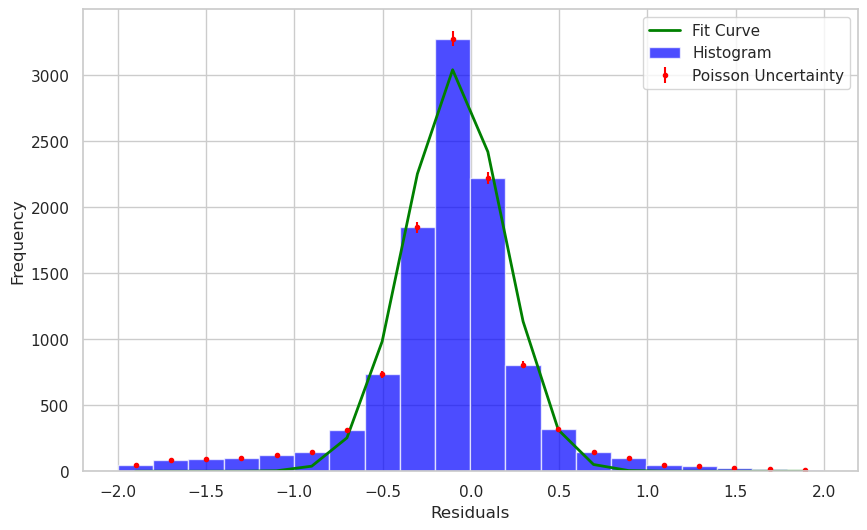

In [12]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# Load the pickle file
with open('./data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

# Checking if data is a dictionary within a NumPy array
if isinstance(data, np.ndarray) and isinstance(data.item(), dict):
    data_dict = data.item()
else:
    data_dict = data

# Creating a DataFrame
df = pd.DataFrame(data_dict, columns=['residuals', 'distances'])

# Cleaning the sample
df_cleaned = df[abs(df['residuals']) < 2]

# Create a histogram with Poisson uncertainty
hist, bin_edges = np.histogram(df_cleaned['residuals'], bins=20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
uncertainties = np.sqrt(hist)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], color='blue', alpha=0.7, label='Histogram')
plt.errorbar(bin_centers, hist, yerr=uncertainties, fmt='.', color='red', label='Poisson Uncertainty')

# Defining an appropriate function and fit it to the histogram
def fit_function(x, amplitude, mean, sigma):
    return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2))

# Initial guess for the parameters
initial_guess = [100, 0, 1]

# Fitting the function to the data without absolute_sigma=True
params, covariance = curve_fit(fit_function, bin_centers, hist, p0=initial_guess, sigma=uncertainties)

# Normalizing the expected frequencies
fit_curve_normalized = fit_function(bin_centers, *params)
fit_curve_normalized = fit_curve_normalized / fit_curve_normalized.sum() * hist.sum()

# Plot the fit curve
plt.plot(bin_centers, fit_curve_normalized, color='green', linewidth=2, label='Fit Curve')

# Calculate the chi-squared value and p-value
chi_squared, p_value = chisquare(hist, f_exp=fit_curve_normalized, ddof=len(params))

# Display the results
print(f"Chi-squared value: {chi_squared}")
print(f"P-value of the fit: {p_value}")

# Check the goodness of fit
if p_value < 0.05:
    print("The fit function may not be appropriate to describe the data.")
else:
    print("The fit function is appropriate to describe the data.")

# Add labels and legend
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

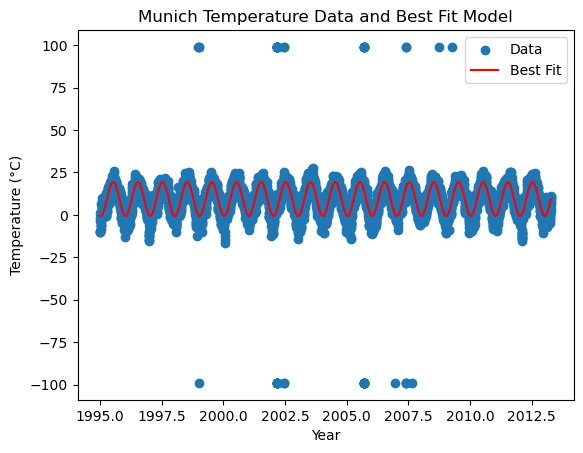

Best-fit parameters:
a: -9.988133676460334
b: 12.333023014281954
c: 9.384114874727588

Parameter uncertainties:
a: 0.17961047339328395
b: 0.01798305242117876
c: 0.12700529104206215

Overall average temperature: 8.941907038598593

Predicted temperature for the coldest time of the year: -0.3333180376448297
Predicted temperature for the hottest time of the year: 19.101547787100007

RSS for f(x): 34359.85859996652
RSS for g(x): 34298.77918001815

F-statistic: 2.594632141211109
P-value: 1.1102230246251565e-16


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import f

# Read the data from the file
data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
years = data[:, 0]
temperatures = data[:, 1]

# Define the function to fit
def model_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Select data in the range 2008 to 2012
mask = (years >= 2008) & (years <= 2012)
selected_years = years[mask]
selected_temperatures = temperatures[mask]

# Fit the model to the data
popt, pcov = curve_fit(model_function, selected_years, selected_temperatures)

# Plot the data and the best-fit model
plt.scatter(years, temperatures, label='Data')
plt.plot(years, model_function(years, *popt), 'r', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Munich Temperature Data and Best Fit Model')
plt.legend()
plt.show()

# Display the best-fit parameters and their uncertainties
print('Best-fit parameters:')
print('a:', popt[0])
print('b:', popt[1])
print('c:', popt[2])
print('\nParameter uncertainties:')
print('a:', np.sqrt(pcov[0, 0]))
print('b:', np.sqrt(pcov[1, 1]))
print('c:', np.sqrt(pcov[2, 2]))

# Calculate overall average temperature
overall_average = np.mean(temperatures)
print('\nOverall average temperature:', overall_average)

# Calculate predicted values for coldest and hottest times of the year
coldest_time_prediction = model_function(0, *popt)
hottest_time_prediction = model_function(0.5, *popt)
print('\nPredicted temperature for the coldest time of the year:', coldest_time_prediction)
print('Predicted temperature for the hottest time of the year:', hottest_time_prediction)

# Comment on the meaning of the b parameter
# The b parameter represents the phase shift in the cosine function, determining the position of the peak or trough in the wave. In the context of temperature data, it could represent the timing of the seasonal temperature cycle, indicating when the temperatures are typically at their maximum or minimum.

# Optional: Fit the data with a function g(x) with an additional parameter
def model_function_g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t + b) + c * t + d

# Fit the model with the additional parameter
popt_g, pcov_g = curve_fit(model_function_g, selected_years, selected_temperatures)

# Calculate the residual sum of squares (RSS) for f(x) and g(x)
rss_f = np.sum((selected_temperatures - model_function(selected_years, *popt))**2)
rss_g = np.sum((selected_temperatures - model_function_g(selected_years, *popt_g))**2)

# Perform the Fisher F-test
df_f = len(selected_years) - len(popt)  # degrees of freedom for f(x)
df_g = len(selected_years) - len(popt_g)  # degrees of freedom for g(x)
f_statistic = ((rss_f - rss_g) / (len(popt_g) - len(popt))) / (rss_g / df_g)
p_value = 1 - f.cdf(f_statistic, df_g, df_f)

print('\nRSS for f(x):', rss_f)
print('RSS for g(x):', rss_g)
print('\nF-statistic:', f_statistic)
print('P-value:', p_value)
